###Импортирование необходимых библиотек

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Исследуем основные характеристики датасета

In [4]:
data = pd.read_csv("/content/drive/MyDrive/data/seattle-weather.csv")

In [5]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Веделим новые столбцы, разбив дату

In [6]:
data['month'] = data['date'].map(lambda x: int(x[5:7]))
data['year'] = data['date'].map(lambda x: int(x[:4]))
data = data.drop(['date'], axis=1)
data.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,2012
1,10.9,10.6,2.8,4.5,rain,1,2012
2,0.8,11.7,7.2,2.3,rain,1,2012
3,20.3,12.2,5.6,4.7,rain,1,2012
4,1.3,8.9,2.8,6.1,rain,1,2012


In [7]:
data.shape

(1461, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   month          1461 non-null   int64  
 6   year           1461 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 80.0+ KB


In [9]:
data.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
month            0
year             0
dtype: int64

In [10]:
data['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

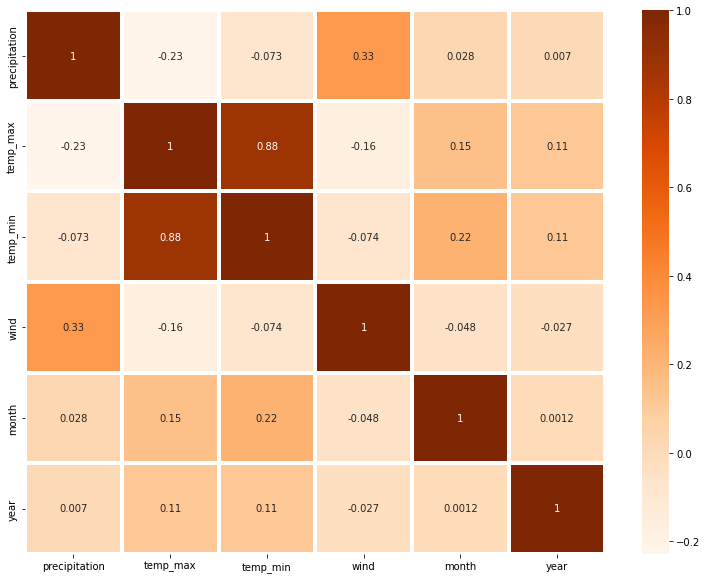

In [11]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Oranges", annot=True, linewidth=3)

Из матрицы корреляции видно, что наиболее сильно коррелируют максимальная и минимальная температуры, что логично

([<matplotlib.patches.Wedge at 0x7fe945f08f50>,
 [Text(-1.0928641841701052, -0.1250914663684565, 'drizzle'),
  Text(-0.9928183516776712, -0.4736155831178194, 'fog'),
  Text(0.4980191550645755, -0.9808042216409789, 'rain'),
  Text(1.0394657443356503, 0.35987632091141075, 'snow'),
  Text(-0.2127140324335935, 1.0792371103728042, 'sun')],
 [Text(-0.5961077368200572, -0.068231708928249, '3.6%'),
  Text(-0.5415372827332752, -0.2583357726097196, '6.9%'),
  Text(0.2716468118534048, -0.5349841208950793, '43.9%'),
  Text(0.5669813150921729, 0.19629617504258765, '1.8%'),
  Text(-0.11602583587286916, 0.5886747874760749, '43.8%')])

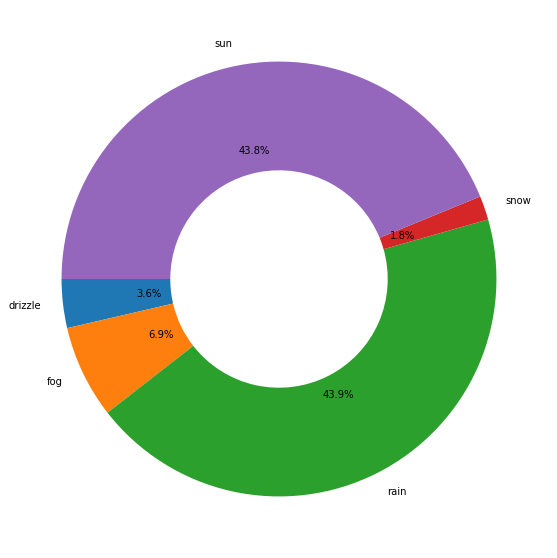

In [12]:
plt.figure(figsize=(10, 10))
df = data.groupby(by = 'weather').count()
df
labels = df.index
sizes = df['precipitation']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5),startangle=180)

Из круговой диаграммы видно, что в неком городе больше всего дождливых дней, чуть меньше солнечных. А снег там почти не выпадает

In [99]:
wind_by_month = data.pivot_table(index=['month'], values='wind', columns='year')

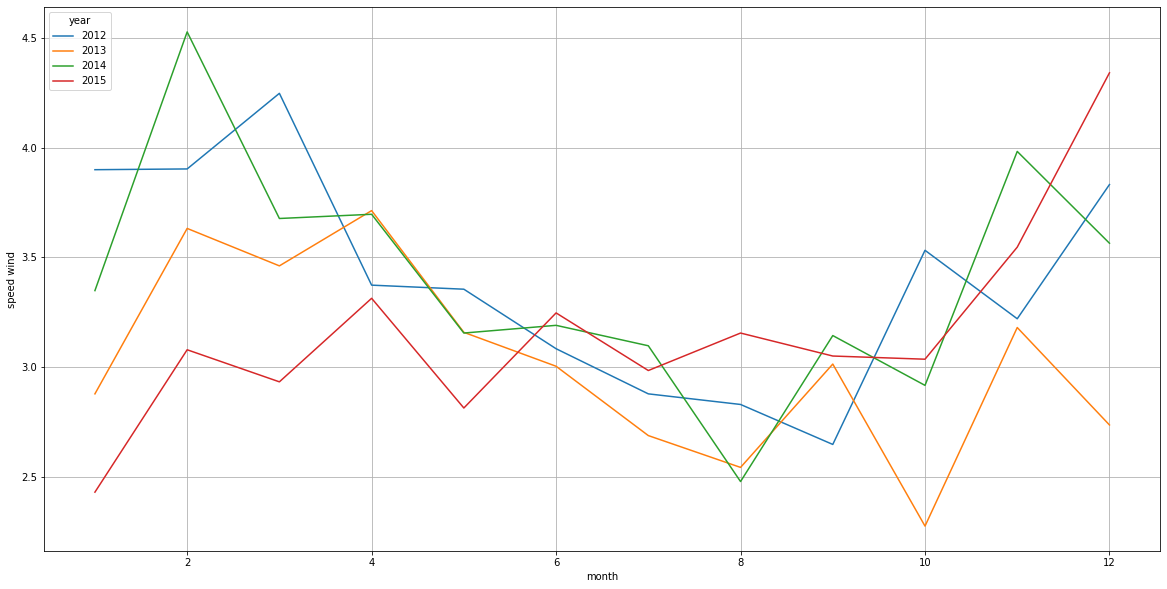

In [100]:
wind_by_month.plot.line(figsize=(20,10), grid="on");
plt.ylabel("speed wind");

 Разбив и сгрупировав среднюю скорость ветра по годам и месяцам можно увидеть ее изменения с 2012 по 2015 года в разне месяцы. Можно заметить, что летом и осенью скорость ветра из года в год мало отличается, а вот весной и зимой погода более непредсказуемая.

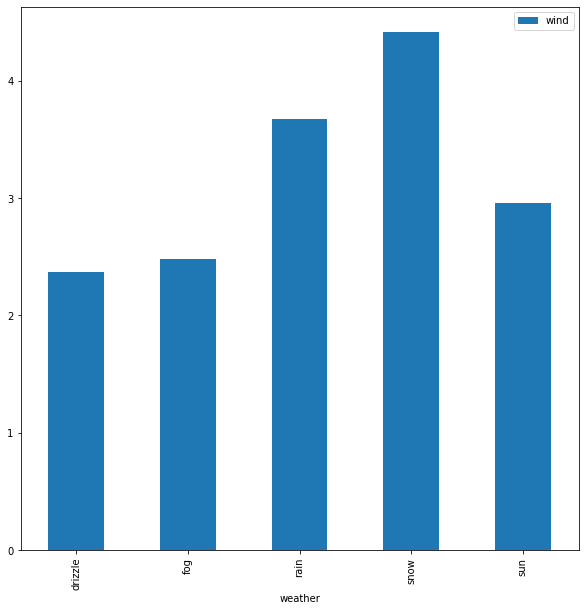

In [120]:

df1 = data.groupby(by = 'weather').agg({"wind":"mean"})
df1.plot(kind='bar', figsize=(10,10))
#sns.plot(x="weather", y="speed wind", data=df1) #, order = data['weather'].value_counts().index)
#plt.xticks(rotation=90)

Из гистограммы видно, что во время выпадения снега наблюдается наибольшая скорость ветра, а во время тумана и мороси наименьшая

In [14]:
weather_by_temp = data[['weather','temp_max','temp_min']]
weather_by_temp['temp_avg'] = (weather_by_temp['temp_max'] + weather_by_temp['temp_min'])/2
weather_by_temp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,weather,temp_max,temp_min,temp_avg
0,drizzle,12.8,5.0,8.90
1,rain,10.6,2.8,6.70
2,rain,11.7,7.2,9.45
3,rain,12.2,5.6,8.90
4,rain,8.9,2.8,5.85


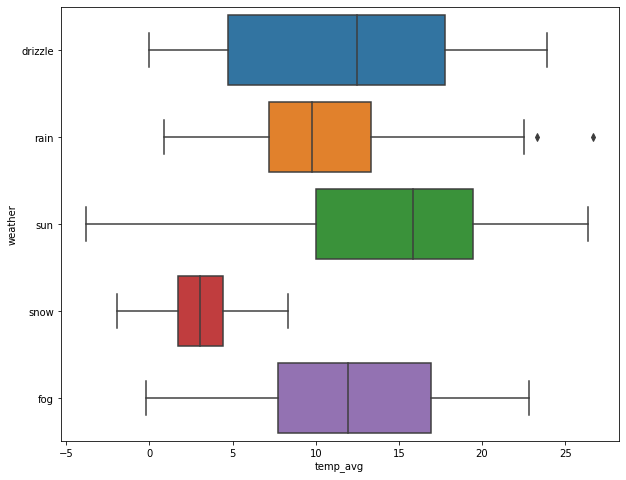

In [82]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=weather_by_temp['temp_avg'], y=weather_by_temp['weather'])

Изходя из графика боксплота можно сделать вывод какая средняя дневная температура сопрововождает какие дни: солнечные, дождливые, туманные и т.д. Самый большой температурный размах в солнечные дни. Но чаще всего температура колеблется в дни, когда дождь моросит, о чем говорит длинное тело. Самая большая медиана в солнечные дни, самая малая в снежные.

На основании проведенного анализа можно сделать следующий вывод: 

*   В городе N солнечных и дождливых дней равное кол-во;
*   Самый сильный сильный ветер наблюдается во время снега;
*   Летом и осенью скорость ветра мало меняется из года в год;
*   Если температура выше 14 градусов, то сильный дождь маловероятен.
